## 1. Packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from google.colab import drive
import sys
import importlib
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, BatchNormalization, ReLU
from tensorflow.keras import Sequential
import os
# reload kernel
%load_ext autoreload
%autoreload 2
importlib.reload(sys)

drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/nn_tf')

Mounted at /content/drive


In [98]:
%cd /content/drive/MyDrive/nn_tf

!git add .


/content/drive/MyDrive/nn_tf
Branch 'main' set up to track remote branch 'main' from 'origin'.
Everything up-to-date


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from model import NeuralNetwork
from layers.denseLayer import Dense
from layers.batchNormalization import BatchNorm
from layers.relu import Relu
from layers.dropout import Dropout
from dataset import DataLoader

In [4]:
dataset = DataLoader()

<a name='2'></a>
## 2 - Load and Process the Dataset

You'll be using the same "Cat vs non-Cat" dataset as in "Logistic Regression as a Neural Network" (Assignment 2). The model you built back then had 70% test accuracy on classifying cat vs non-cat images. Hopefully, your new model will perform even better!

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of `m_train` images labelled as cat (1) or non-cat (0)
    - a test set of `m_test` images labelled as cat and non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset. Load the data by running the cell below.

In [81]:
train_3, test_3, shape_3, classes_3 = dataset.load_cats_dataset()

y = . It's a b'non-cat' picture.


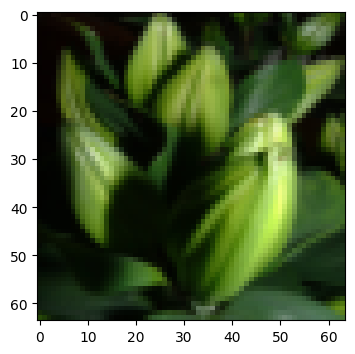

In [82]:
# Example of a
index = 67
batch = train_3.batch(1).skip(index).take(1)
for img_batch, label_batch in batch:
    img = img_batch[0]
    img_label = label_batch[0][0].numpy()

plt.imshow(img)
print ("y = " + ". It's a " + str(classes_3[img_label]) +  " picture.")

NN from Scratch

In [83]:
nn_cats = NeuralNetwork()

In [85]:
nn_cats.assemble(input_shape=(train_3.cardinality().numpy(),tf.reduce_prod(shape_3).numpy()),
                 label_shape=1,
                 optimizer="adam",
                 learning_rate0=1e-3,
                 decay_steps=500,
                 )

In [86]:
nn_cats.Sequential([
    Dense(128, use_bias=False),
    BatchNorm(),
    Relu(),
    Dropout(0.4),

    Dense(64, use_bias=False),
    BatchNorm(),
    Relu(),
    Dropout(0.2),

    Dense(32, use_bias=False),
    BatchNorm(),
    Relu(),

    Dense(1, activation='sigmoid')
], batch_size=64)

Cost after epoch 1 : 0.0111143785
Cost after epoch 2 : 0.00931012
Cost after epoch 3 : 0.00860828161
Cost after epoch 4 : 0.00839618593
Cost after epoch 5 : 0.00785704236
Cost after epoch 6 : 0.0072438363
Cost after epoch 7 : 0.00739618251
Cost after epoch 8 : 0.00689418241
Cost after epoch 9 : 0.00600762479
Cost after epoch 10 : 0.00623119716
Cost after epoch 11 : 0.00576161221
Cost after epoch 12 : 0.00539832143
Cost after epoch 13 : 0.00512065738
Cost after epoch 14 : 0.00529464101
Cost after epoch 15 : 0.00476072496
Cost after epoch 16 : 0.00486267172
Cost after epoch 17 : 0.00434174668
Cost after epoch 18 : 0.00438173581
Cost after epoch 19 : 0.00390448608
Cost after epoch 20 : 0.00399239734
Cost after epoch 21 : 0.00352380169
Cost after epoch 22 : 0.0036125211
Cost after epoch 23 : 0.00379514811
Cost after epoch 24 : 0.00353716314
Cost after epoch 25 : 0.00333255157
Cost after epoch 26 : 0.00289854
Cost after epoch 27 : 0.00259935809
Cost after epoch 28 : 0.00271094451
Cost after

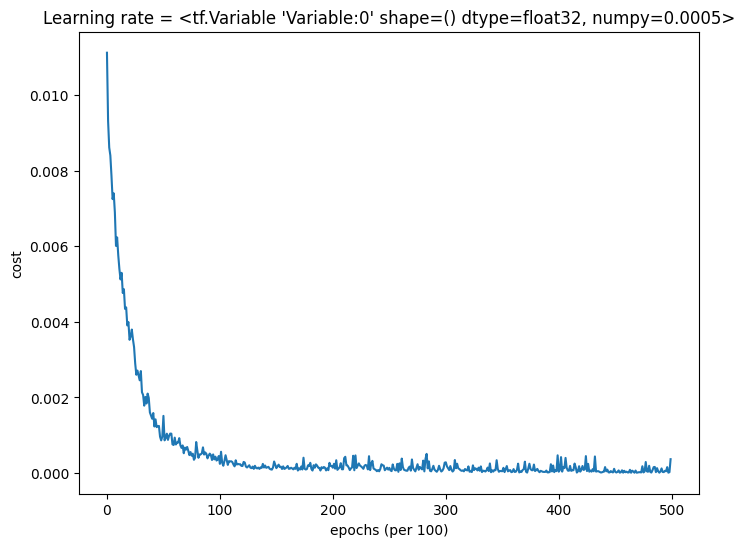

In [87]:
nn_cats.fit_tf(train_3)

Tensorflow NN

In [88]:
nn_cats_tf = Sequential([
    Conv2D(filters=32, kernel_size=(7,7), strides=(2,2), padding='same'),
    BatchNormalization(axis=3),
    ReLU(),
    MaxPool2D(pool_size=(8,8), strides=(8,8), padding='same'),
    Flatten(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(128),
    BatchNormalization(axis=1),
    ReLU(),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [90]:
epochs = 100
batch_size = 64

In [91]:
nn_cats_tf.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [92]:
history_cats = nn_cats_tf.fit(train_3.batch(batch_size).prefetch(tf.data.AUTOTUNE), epochs=epochs)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.4945 - loss: 0.7884
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.6314 - loss: 0.6454
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.7248 - loss: 0.5568
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.7460 - loss: 0.5403
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.7901 - loss: 0.4327
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.7913 - loss: 0.4204
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.8302 - loss: 0.3813
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.8914 - loss: 0.3465
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.8728 - loss: 0.3383
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8697 - loss: 0.3192
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8907 - loss: 0.2959 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9

In [93]:
batch = test_3.batch(train_3.cardinality().numpy())

pred_tf = (nn_cats_tf.predict(test_3.batch(64)) >= 0.5).astype(int).flatten().tolist()

for img_batch, label_batch in batch:
    nn_cats.predict(img_batch, label_batch)
    img = img_batch
    img_label = label_batch
    img_label_pred = nn_cats.predict(img_batch, label_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Accuracy: 0.6800000071525574
Accuracy: 0.6800000071525574


y = tf.Tensor([1], shape=(1,), dtype=int64). It's a cat picture.
y_pred_sratch = tf.Tensor(1, shape=(), dtype=int32). It's a cat picture.
y_pred_tf = 1. It's a cat picture.


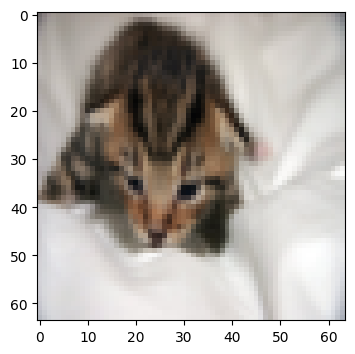

In [97]:
# Example of a

index = 1
plt.imshow(img[index])
print ("y = " + str(img_label[index]) + ". It's a " + classes_3[img_label[index][0]].decode("utf-8") +  " picture.")
print ("y_pred_sratch = " + str(img_label_pred[0][index]) + ". It's a " + classes_3[img_label_pred[0][index]].decode("utf-8") +  " picture.")
print ("y_pred_tf = " + str(pred_tf[index]) + ". It's a " + classes_3[pred_tf[index]].decode("utf-8") +  " picture.")

## <a name='4-1'></a>
### 4.1 - Load the SIGNS Dataset

As a reminder, the SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5.

In [7]:
train_2, test_2, shape_2, classes_2 = dataset.load_finger_signs_dataset()

4
y = 4. It's a 4 picture.


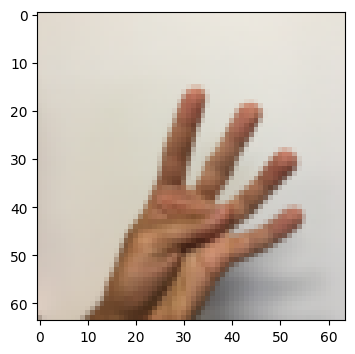

In [8]:
# Example of a
index = 67
batch = train_2.batch(1).skip(index).take(1)
for img_batch, label_batch in batch:
    img = img_batch[0]
    img_label = tf.argmax(label_batch[0]).numpy()
    print(img_label)

plt.imshow(img)
print ("y = " + str(img_label) + ". It's a " + str(classes_2[img_label]) +  " picture.")

Scratch NN

In [33]:
nn_signs = NeuralNetwork()

In [34]:
nn_signs.assemble(input_shape=(train_2.cardinality().numpy(),tf.reduce_prod(shape_2).numpy()),
                 label_shape=len(classes_2),
                 optimizer="adam",
                 learning_rate0=1e-3,
                 decay_steps=500,
                 )

In [35]:
nn_signs.Sequential([
    Dense(256, use_bias=False),
    BatchNorm(),
    Relu(),

    Dense(32, use_bias=False),
    BatchNorm(),
    Relu(),

    Dense(128),
    Relu(),

    Dense(len(classes_2), activation='softmax')
], batch_size=64)

In [36]:
nn_signs.fit(train_2)

Cost after epoch 1 : 0.598996699
Cost after epoch 2 : 0.454907358
Cost after epoch 3 : 0.418400884
Cost after epoch 4 : 0.398982137
Cost after epoch 5 : 0.393894106
Cost after epoch 6 : 0.386233687
Cost after epoch 7 : 0.384481937
Cost after epoch 8 : 0.386244804
Cost after epoch 9 : 0.382351398
Cost after epoch 10 : 0.383921146
Cost after epoch 11 : 0.3815386
Cost after epoch 12 : 0.382763833
Cost after epoch 13 : 0.382536829
Cost after epoch 14 : 0.381163061
Cost after epoch 15 : 0.381507397
Cost after epoch 16 : 0.38024658
Cost after epoch 17 : 0.379919559
Cost after epoch 18 : 0.379460186
Cost after epoch 19 : 0.378254145
Cost after epoch 20 : 0.380920112
Cost after epoch 21 : 0.380414069
Cost after epoch 22 : 0.379387
Cost after epoch 23 : 0.380371898
Cost after epoch 24 : 0.379690886
Cost after epoch 25 : 0.380685031
Cost after epoch 26 : 0.382580191
Cost after epoch 27 : 0.381815076
Cost after epoch 28 : 0.380364448
Cost after epoch 29 : 0.381021947
Cost after epoch 30 : 0.38060

KeyboardInterrupt: 

Tf NN

In [37]:
nn_signs_tf = Sequential([
    Conv2D(filters=32, kernel_size=(7,7), strides=(2,2), padding='same'),
    BatchNormalization(axis=3),
    ReLU(),
    MaxPool2D(pool_size=(8,8), strides=(8,8), padding='same'),
    Flatten(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(128),
    BatchNormalization(axis=1),
    ReLU(),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(len(classes_2), activation='softmax')
])

In [38]:
nn_signs_tf.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                   loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=['accuracy'])

In [39]:
history_signs = nn_signs_tf.fit(train_2.batch(64).prefetch(tf.data.AUTOTUNE), epochs=50)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.2305 - loss: 2.0362
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - accuracy: 0.4503 - loss: 1.3902
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - accuracy: 0.5855 - loss: 1.0808
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - accuracy: 0.6590 - loss: 0.9084
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.6962 - loss: 0.8205
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.7467 - loss: 0.7413
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7520 - loss: 0.7060
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.7855 - loss: 0.6313
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.8231 - loss: 0.5264
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.8329 - loss: 0.5014
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.8196 - loss: 0.5270
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step

In [40]:
nn_signs_tf.evaluate(test_2.batch(64).prefetch(tf.data.AUTOTUNE))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9458 - loss: 0.1446 


[0.14287304878234863, 0.949999988079071]

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

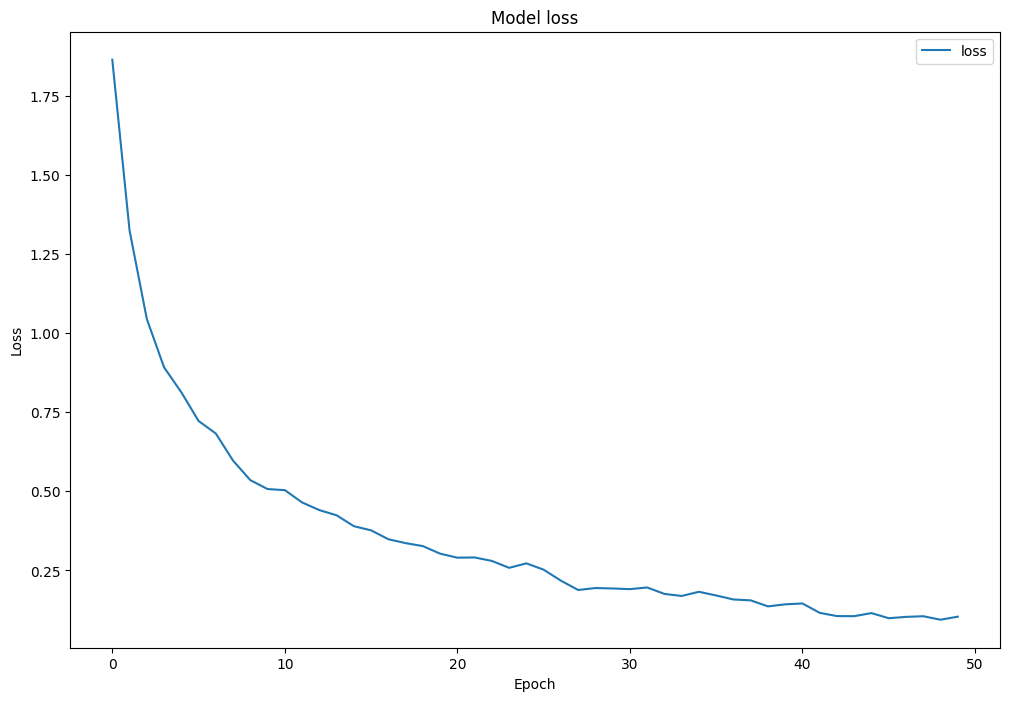

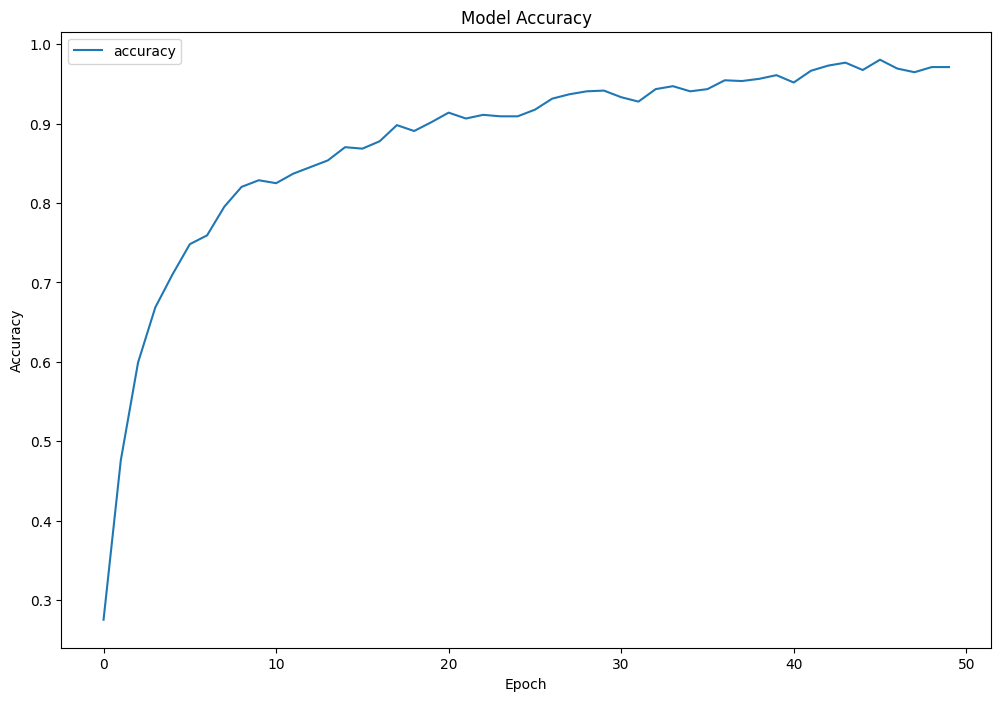

In [42]:
df_loss_acc = pd.DataFrame(history_signs.history)
df_loss= df_loss_acc[['loss']]
df_acc= df_loss_acc[['accuracy']]
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [77]:
batch = test_2.batch(train_2.cardinality().numpy())

pred_tf = nn_signs_tf.predict(batch)
pred_tf = np.argmax(pred_tf, axis=1)

for img_batch, label_batch in batch:
    nn_signs.predict(img_batch, label_batch)
    img = img_batch
    img_label = label_batch
    img_label_pred = nn_signs.predict(img_batch, label_batch)
    img_label_pred = tf.argmax(img_label_pred, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Accuracy: 0.9888888597488403
Accuracy: 0.9888888597488403


y = tf.Tensor([0. 0. 0. 1. 0. 0.], shape=(6,), dtype=float64). It's a 3 picture.
y_pred = tf.Tensor(3, shape=(), dtype=int64). It's a 3 picture.
y_pred_tf = 3. It's a 3 picture.


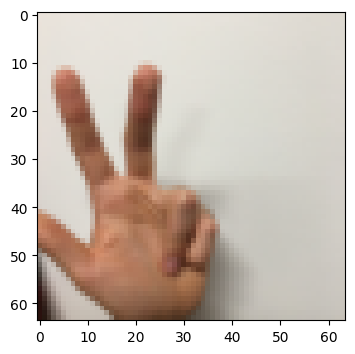

In [80]:
index = 111
plt.imshow(img[index])
print ("y = " + str(img_label[index]) + ". It's a " + str(classes_2[tf.argmax(img_label[index])]) +  " picture.")
print ("y_pred_sracth = " + str(img_label_pred[index]) + ". It's a " + str(classes_2[img_label_pred[index]]) +  " picture.")
print ("y_pred_tf = " + str(pred_tf[index]) + ". It's a " + str(classes_2[pred_tf[index]]) +  " picture.")